# **Master in Data Science and Engineering**

## MECD 10 - Advanced Topics on Machine Learning    </small>  
**Professors:** Diogo Pernes and Luís Filipe Teixeira<br>

* Fabiana Rodrigues da Silva
* Gabriel Copolecchia Carvalhal
* Guilherme Carlos Salles

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Imports

In [1]:
!pip install --quiet tensorflow-addons

In [2]:
#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

#packages
import glob
import os
import cv2
import seaborn as sns
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.ticker import MaxNLocator
from datetime import datetime
from glob import glob
%matplotlib inline

#keras
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Input
from keras.models import Sequential, load_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras_preprocessing import image
from tensorflow.keras.models import load_model
from keras.optimizers.optimizer_experimental import optimizer

## Data Connection

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
##Import images from Drive

#!ls "/content/gdrive/My Drive/Mestrado/3_semestre/TAAC/Project_TAAC/chest_xray/"

#path_train = "/content/gdrive/My Drive/Mestrado/3_semestre/TAAC/Project_TAAC/chest_xray/train/"

#path_test = "/content/gdrive/My Drive/Mestrado/3_semestre/TAAC/Project_TAAC/chest_xray/test/"

#path_val  = "/content/gdrive/My Drive/Mestrado/3_semestre/TAAC/Project_TAAC/chest_xray/val/"

path_train = "/content/gdrive/MyDrive/10_ColabNotebooks/AdvancedML_Dataset/chest_xray/train/"

path_test = "/content/gdrive/MyDrive/10_ColabNotebooks/AdvancedML_Dataset/chest_xray/test/"

path_val  = "/content/gdrive/MyDrive/10_ColabNotebooks/AdvancedML_Dataset/chest_xray/val/"



In [5]:
labels = ['NORMAL','PNEUMONIA']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
train = get_data(path_train)
test = get_data(path_test)
val = get_data(path_val)

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



## Data Visualizion

In [7]:
#Plot graph
def plot_graph(dataset):
  l = []
  for i in dataset:
      if(i[1] == 0):
          l.append("Normal")
      else:
          l.append("Pneumonia")
  sns.set_style('white')
  ax = sns.countplot(l)
  

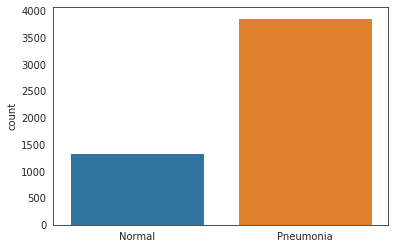

In [ ]:
#See the distribution data for train
plot_graph(train)

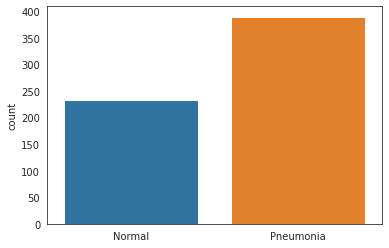

In [ ]:
#See the distribution data for test
plot_graph(test)

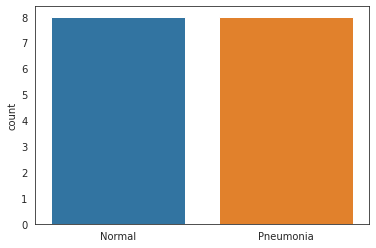

In [ ]:
#See the distribution data for validation
plot_graph(val)

In [ ]:
#Preview images
f, axs = plt.subplots(1,2,figsize=(12,5))
axs[0].title.set_text(labels[train[0][1]])
axs[0].imshow(train[0][0],cmap="gray")

axs[1].title.set_text(labels[train[-1][1]])
axs[1].imshow(train[-1][0],cmap="gray")


## Models

### End to End

#### Data Pre-Processing

In [8]:
#Separate feature and label
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [9]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [10]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [11]:
#checking image size
print("Training Shape:")
print(x_train.shape)
print(y_train.shape)
print("")

print("Testing Shape:")
print(x_test.shape)
print(y_test.shape)
print("")

print("Validation Shape:")
print(x_val.shape)
print(y_val.shape)
print("")

Training Shape:
(5216, 224, 224, 1)
(5216,)

Testing Shape:
(624, 224, 224, 1)
(624,)

Validation Shape:
(16, 224, 224, 1)
(16,)



#### Data Augmentation
The training dataset is  **imbalanced** . To increase the number of training examples, we use data augmentation techniques. 

In [12]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train, seed=42)

**For the data augmentation:**
1. Randomly rotate some training images by 30 degrees 
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width 
4. Randomly shift images vertically by 10% of the height 
5. Randomly flip images horizontally.

#### Model

In [ ]:
IMG_SIZE1 = x_train.shape[1]
IMG_SIZE2 = x_train.shape[2]
CHANNEL = 1

model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape=(IMG_SIZE1, IMG_SIZE2, CHANNEL)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

#Compile
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     2

Second Model - Group

In [ ]:
# # let's build the CNN model
# model = Sequential()

# IMG_SIZE1 = x_train.shape[1]
# IMG_SIZE2 = x_train.shape[2]
# CHANNEL = 1

# #1st Block 
# model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(IMG_SIZE1, IMG_SIZE2, CHANNEL)))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size = (2, 2)))  
# model.add(Dropout(0.2))

# # 2nd Block
# model.add(Conv2D(32, (3, 3), activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

# # Flatten the layer
# model.add(Flatten())

# # Fully Connected Layers
# model.add(Dense(activation = 'relu', units = 128))
# model.add(Dense(activation = 'sigmoid', units = 1))

# # Compile the Neural network
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
#model.summary()

In [ ]:
#Reduce learning rate when a metric has stopped improving.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

#save the best model (as a function of val_accuracy) on the way to training
checkpoint = ModelCheckpoint('model1_best_model.hdf5', verbose=1, save_best_only=True, monitor='val_accuracy')

#### Training

Define Steps

In [ ]:
#Apply data augumetation to train, and validating with the validation dataset
epoch_num = 15
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = epoch_num , validation_data = datagen.flow(x_test, y_test) ,callbacks = [checkpoint,learning_rate_reduction])

Epoch 1/15
163/163 [==============================] - ETA: 0s - loss: 0.5902 - accuracy: 0.8248
Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to model1_best_model.hdf5
163/163 [==============================] - 32s 134ms/step - loss: 0.5902 - accuracy: 0.8248 - val_loss: 75.1003 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - ETA: 0s - loss: 0.3061 - accuracy: 0.8886
Epoch 2: val_accuracy did not improve from 0.62500
163/163 [==============================] - 19s 117ms/step - loss: 0.3061 - accuracy: 0.8886 - val_loss: 69.8409 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 0.2366 - accuracy: 0.9124
Epoch 3: val_accuracy did not improve from 0.62500

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 21s 130ms/step - loss: 0.2366 - accuracy: 0.9124 - val_loss: 15.8563 - val_accuracy: 0.6250 - lr: 0.00

Prediction

In [ ]:
predictions = model.predict(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

#y_pred
y_pred =  (predictions > 0.5).astype("int").reshape(624,)

#true_classes = test_generator.classes
y_label = y_test

20/20 [==============================] - 0s 22ms/step


#### Evaluation

Training Accurancy

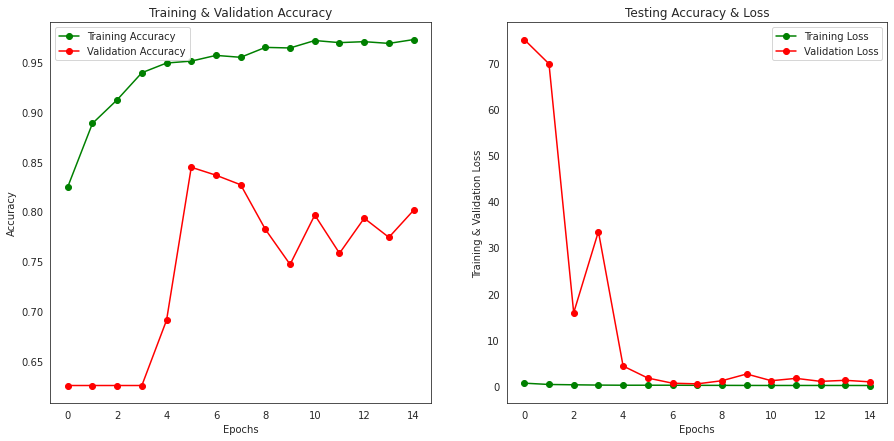

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(15,7)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_facecolor("white")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].set_facecolor("white")
plt.show()
plt.savefig("model1_trainingloss.jpg")

Classification Matrix

In [ ]:
target_names = ['NORMAL','PNEUMONIA']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      NORMAL       0.88      0.84      0.86       234
   PNEUMONIA       0.91      0.93      0.92       390

    accuracy                           0.89       624
   macro avg       0.89      0.88      0.89       624
weighted avg       0.89      0.89      0.89       624



Confusion Matrix

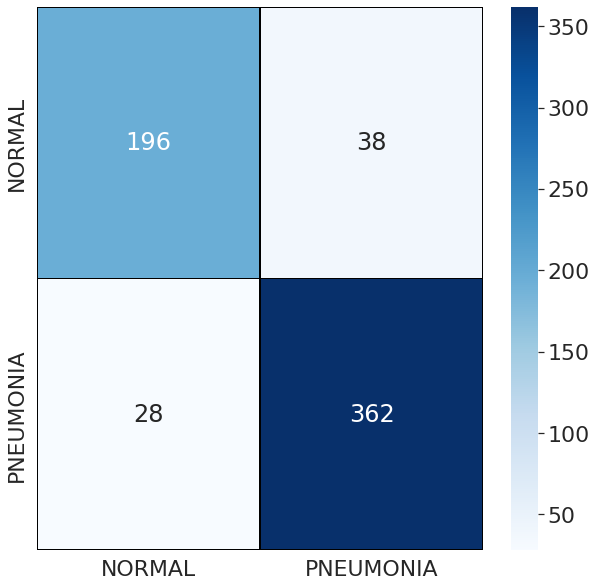

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels, fmt="")


In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
fpr, tpr, thresholds2 = roc_curve(y_test, y_pred)

In [ ]:
f1_score_end_to_end =  2 * ((precisions * recalls) / (precisions + recalls))
precision_end_to_end = precisions
recall_end_to_end = recalls

**AUC** AREA UNDER THE CURVE

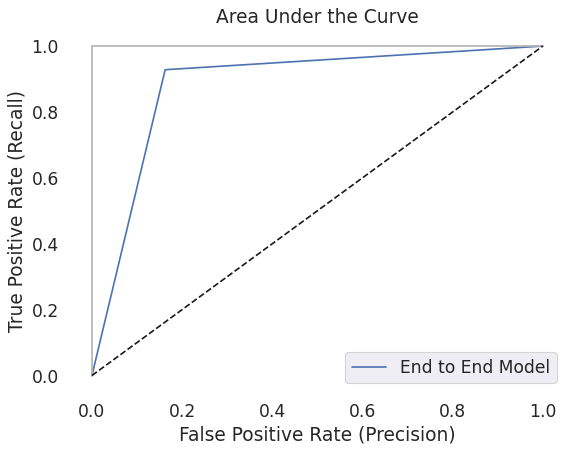

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr, tpr)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['End to End Model'], loc='best')
ax.set_facecolor("white")
plt.show()

Metrics

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")
acc_end_to_end = model.evaluate(x_test,y_test)[1]

20/20 [==============================] - 0s 23ms/step - loss: 0.3089 - accuracy: 0.8942
Loss of the model is -  0.3088812828063965
20/20 [==============================] - 0s 20ms/step - loss: 0.3089 - accuracy: 0.8942
Accuracy of the model is -  89.42307829856873 %
20/20 [==============================] - 0s 20ms/step - loss: 0.3089 - accuracy: 0.8942


#### Predictions

In [ ]:
correct = np.nonzero(y_test == y_pred)[0]
print('Correct Predicted: ', len(correct))
incorrect = np.nonzero(y_test != y_pred)[0]
print('Incorrect Predicted: ', len(incorrect))

Correct Predicted:  558
Incorrect Predicted:  66


Correctly Predicted Classes

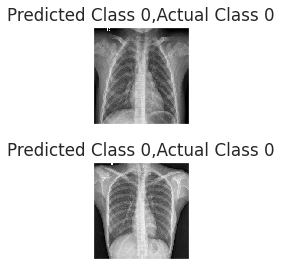

In [ ]:
i = 0
for c in correct[1:3]:
    plt.subplot(2,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(224,224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred[c], y_test[c]))
    plt.tight_layout()
    i += 1

Incorrectly Predicted Classes

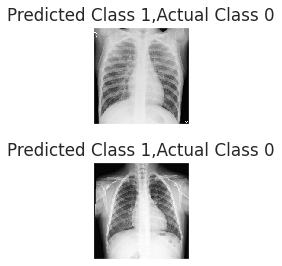

In [ ]:
i = 0
for c in incorrect[1:3]:
    plt.subplot(2,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(224,224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred[c], y_test[c]))
    plt.tight_layout()
    i += 1

### RESNET 50

#### Data Pre Processing

In [35]:
labels = ['NORMAL','PNEUMONIA']
img_size = 224
def get_training_data_color(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [36]:
train_3c = get_training_data_color(path_train)
test_3c = get_training_data_color(path_test)
val_3c = get_training_data_color(path_val)

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [37]:
x_train_3c = []
y_train_3c = []

x_val_3c = []
y_val_3c = []

x_test_3c = []
y_test_3c = []

for feature, label in train_3c:
    x_train_3c.append(feature)
    y_train_3c.append(label)

for feature, label in test_3c:
    x_test_3c.append(feature)
    y_test_3c.append(label)
    
for feature, label in val_3c:
    x_val_3c.append(feature)
    y_val_3c.append(label)

In [38]:
# Normalize color data
x_train_3c = np.array(x_train_3c) / 255
x_val_3c = np.array(x_val_3c) / 255
x_test_3c = np.array(x_test_3c) / 255

#### Data Augmentation

In [39]:
from numpy.random import shuffle
datagen_3c = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen_3c.fit(x_train_3c, seed=42)

#### Model

In [40]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

#Complie Neural Network
resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_42 (Dense)            (None, 512)               1049088   
                                                                 
 dense_43 (Dense)            (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
#Setting callbakcs
#Reduce learning rate when a metric has stopped improving.
learning_rate_reduction = ReduceLROnPlateau(
      monitor='accuracy', 
      patience = 2, 
      verbose=1,
      factor=0.3, 
      min_lr=0.000001
      )


# #Save the best model (as a function of val_accuracy) on the way to training
checkpoint = ModelCheckpoint('resnet_best_model.hdf5', 
                             verbose=1, 
                             save_best_only=True, 
                             monitor='val_accuracy'
)

#### Training

Define steps

In [ ]:
model_history=resnet_model.fit(
  datagen_3c.flow(x_train_3c,y_train_3c, batch_size = 32),
  validation_data=datagen_3c.flow(x_test_3c, y_test_3c),
  epochs=15,
  callbacks = [checkpoint,learning_rate_reduction] ,verbose=1)

Epoch 1/15
163/163 [==============================] - ETA: 0s - loss: 0.5357 - accuracy: 0.7544
Epoch 1: val_accuracy improved from -inf to 0.68109, saving model to resnet_best_model.hdf5
163/163 [==============================] - 61s 348ms/step - loss: 0.5357 - accuracy: 0.7544 - val_loss: 0.5627 - val_accuracy: 0.6811 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - ETA: 0s - loss: 0.4520 - accuracy: 0.7789
Epoch 2: val_accuracy did not improve from 0.68109
163/163 [==============================] - 55s 339ms/step - loss: 0.4520 - accuracy: 0.7789 - val_loss: 0.7065 - val_accuracy: 0.6458 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 0.4134 - accuracy: 0.8004
Epoch 3: val_accuracy improved from 0.68109 to 0.75962, saving model to resnet_best_model.hdf5
163/163 [==============================] - 55s 337ms/step - loss: 0.4134 - accuracy: 0.8004 - val_loss: 0.5046 - val_accuracy: 0.7596 - lr: 0.0010
Epoch 4/15
163/163 [=============

Prediction

In [ ]:
predictions = resnet_model.predict(x_test_3c)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

#y_pred
y_pred_resnet =  (predictions > 0.5).astype("int").reshape(624,)

#true_classes = test_generator.classes
y_label = y_test_3c

20/20 [==============================] - 2s 94ms/step


#### Evaluation

Training Accurancy

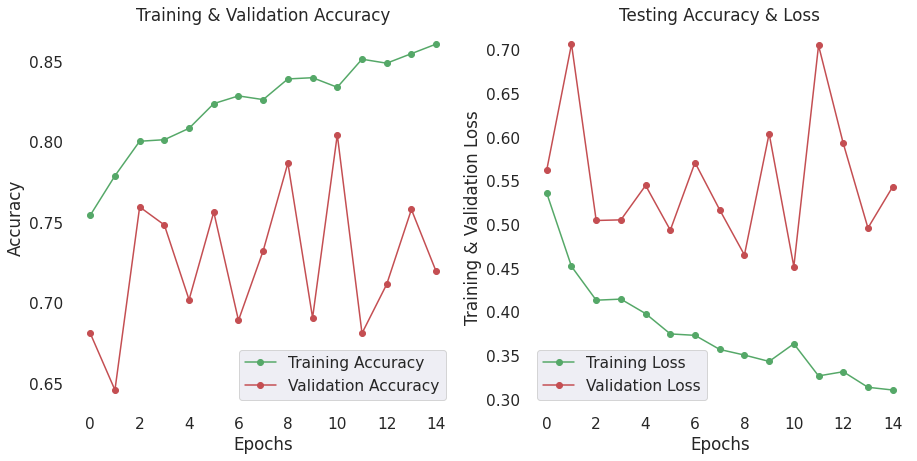

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = model_history.history['accuracy']
train_loss = model_history.history['loss']
val_acc = model_history.history['val_accuracy']
val_loss = model_history.history['val_loss']
fig.set_size_inches(15,7)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_facecolor("white")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].set_facecolor("white")
plt.show()
plt.savefig("modelResNet_trainingloss.jpg")

Classification Report

In [ ]:
target_names = ['NORMAL','PNEUMONIA']
print(classification_report(y_test_3c, y_pred_resnet, target_names=target_names))

              precision    recall  f1-score   support

      NORMAL       0.90      0.40      0.56       234
   PNEUMONIA       0.73      0.97      0.84       390

    accuracy                           0.76       624
   macro avg       0.82      0.69      0.70       624
weighted avg       0.80      0.76      0.73       624



Confusion Matrix

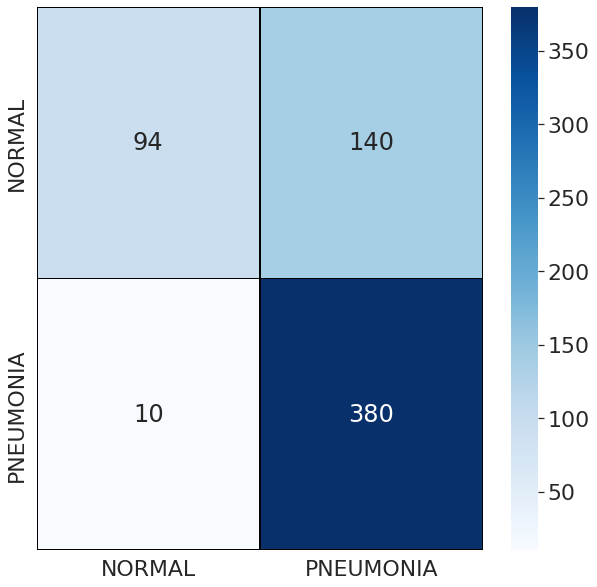

In [ ]:
cm = confusion_matrix(y_test_3c, y_pred_resnet)
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels, fmt="")

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test_3c, y_pred_resnet)
fpr, tpr, thresholds2 = roc_curve(y_test_3c, y_pred_resnet)

In [ ]:
f1_score_resnet = 2 * ((precisions * recalls) / (precisions + recalls))
precision_resnet = precisions
recall_resnet = recalls

**AUC** Area Under The Curve

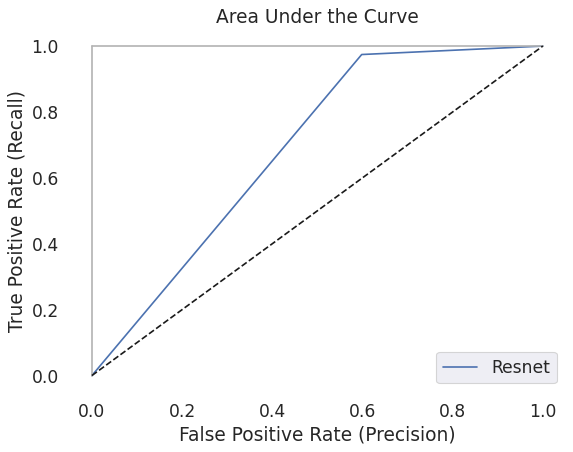

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr, tpr)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['Resnet'], loc='best')
ax.set_facecolor("white")
plt.show()

Metrics

In [ ]:
print("Loss of the model is - " , resnet_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[0])
print("Accuracy of the model is - " , resnet_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]*100 , "%")
acc_resnet = resnet_model.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]

20/20 [==============================] - 6s 294ms/step - loss: 0.5465 - accuracy: 0.7356
Loss of the model is -  0.5465064644813538
20/20 [==============================] - 6s 308ms/step - loss: 0.5499 - accuracy: 0.7276
Accuracy of the model is -  72.75640964508057 %
20/20 [==============================] - 6s 295ms/step - loss: 0.5578 - accuracy: 0.7324


#### Predictions

In [ ]:
correct = np.nonzero(y_test_3c == y_pred_resnet)[0]
print('Correct Predicted: ', len(correct))
incorrect = np.nonzero(y_test_3c != y_pred_resnet)[0]
print('Incorrect Predicted: ', len(incorrect))

Correct Predicted:  474
Incorrect Predicted:  150


Correctly Predicted Classes

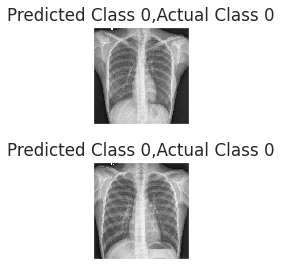

In [ ]:
i = 0
for c in correct[1:3]:
    plt.subplot(2,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_3c[c], cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred_resnet[c], y_test_3c[c]))
    plt.tight_layout()
    i += 1

Incorrectly Predicted Classes

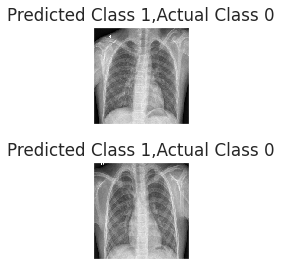

In [ ]:
i = 0
for c in incorrect[1:3]:
    plt.subplot(2,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_3c[c], cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred_resnet[c], y_test_3c[c]))
    plt.tight_layout()
    i += 1

### VGG 16

#### Model

In [12]:
vgg = VGG16(input_shape = (224,224,3), weights = "imagenet", include_top = False)

In [13]:
# We should not train the existing weights otherwise the weights that we captured will get changed
for layer in vgg.layers:
  layer.trainable = False

# Our layers - we can add more if we want. Here we will flatten the existing layers
x = Flatten()(vgg.output)

# Lets create the output layer
prediction = Dense(1, activation = "sigmoid")(x)

# Creating a model object
model_vgg_16 = Model(inputs = vgg.input, outputs = prediction)

# Creating a model object
model_vgg_16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
# Compiling the model - telling the model what cost and optimizatiom method to use

model_vgg_16.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

#### Training

In [15]:
#Setting callbakcs
#Reduce learning rate when a metric has stopped improving.
learning_rate_reduction = ReduceLROnPlateau(
      monitor='accuracy', 
      patience = 2, 
      verbose=1,
      factor=0.3, 
      min_lr=0.000001
      )


# #Save the best model (as a function of val_accuracy) on the way to training
checkpoint = ModelCheckpoint('vgg16_best_model.hdf5', 
                             verbose=1, 
                             save_best_only=True, 
                             monitor='val_accuracy'
)

In [16]:
# Model Fitting
vgg_history = model_vgg_16.fit_generator(datagen_3c.flow(x_train_3c,y_train_3c, batch_size = 32), validation_data = datagen_3c.flow(x_test_3c, y_test_3c), epochs = 15, callbacks = [checkpoint,learning_rate_reduction] ,verbose=1)

Epoch 1/15
163/163 [==============================] - ETA: 0s - loss: 0.2272 - accuracy: 0.9064
Epoch 1: val_accuracy improved from -inf to 0.90224, saving model to vgg16_best_model.hdf5
163/163 [==============================] - 69s 354ms/step - loss: 0.2272 - accuracy: 0.9064 - val_loss: 0.2561 - val_accuracy: 0.9022 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - ETA: 0s - loss: 0.1538 - accuracy: 0.9413
Epoch 2: val_accuracy did not improve from 0.90224
163/163 [==============================] - 56s 345ms/step - loss: 0.1538 - accuracy: 0.9413 - val_loss: 0.2591 - val_accuracy: 0.8974 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 0.1318 - accuracy: 0.9503
Epoch 3: val_accuracy did not improve from 0.90224
163/163 [==============================] - 57s 346ms/step - loss: 0.1318 - accuracy: 0.9503 - val_loss: 0.5185 - val_accuracy: 0.7949 - lr: 0.0010
Epoch 4/15
163/163 [==============================] - ETA: 0s - loss: 0.1177 -

Prediction

In [17]:
predictions = model_vgg_16.predict(x_test_3c)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

#y_pred
y_pred_vgg16 =  (predictions > 0.5).astype("int").reshape(624,)

#true_classes = test_generator.classes
y_label = y_test_3c

20/20 [==============================] - 3s 160ms/step


#### Evaluation

Training Accuracy

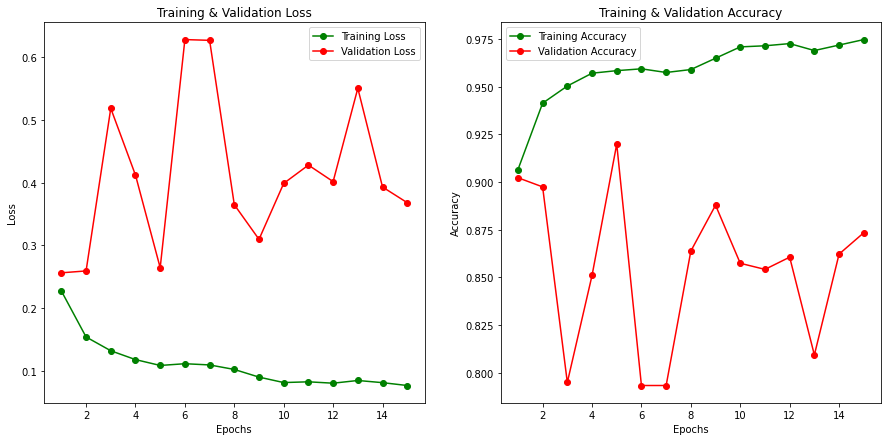

<Figure size 432x288 with 0 Axes>

In [18]:
#Number of epochs in the training section
model_epochs = 15
epochs = [i+1 for i in range(model_epochs)]

#Data
train_acc = vgg_history.history['accuracy']
train_loss = vgg_history.history['loss']
val_acc = vgg_history.history['val_accuracy']
val_loss = vgg_history.history['val_loss']

# Initialise the subplot function using number of rows and columns
figure, (ax1,ax2) = plt.subplots(1, 2)
figure.set_size_inches(15,7)

# Plotting the loss
ax1.plot(epochs,train_loss, 'go-' , label = 'Training Loss')
ax1.plot(epochs,val_loss,'ro-' , label = 'Validation Loss')
ax1.set_title('Training & Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_facecolor("white")
ax1.legend()

# Plotting the accuracy
ax2.plot(epochs,train_acc,'g-o' , label = 'Training Accuracy')
ax2.plot(epochs,val_acc, 'r-o' , label = 'Validation Accuracy')
ax2.set_title('Training & Validation Accuracy')
ax2.legend()
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_facecolor("white")
plt.show()
plt.savefig("modelVGG16_trainingloss.jpg")

Classification Matrix

In [19]:
target_names = ['NORMAL','PNEUMONIA']
print(classification_report(y_test_3c, y_pred_vgg16, target_names = target_names))

              precision    recall  f1-score   support

      NORMAL       0.91      0.87      0.89       234
   PNEUMONIA       0.93      0.95      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.91      0.92       624
weighted avg       0.92      0.92      0.92       624



Confusion Matrix

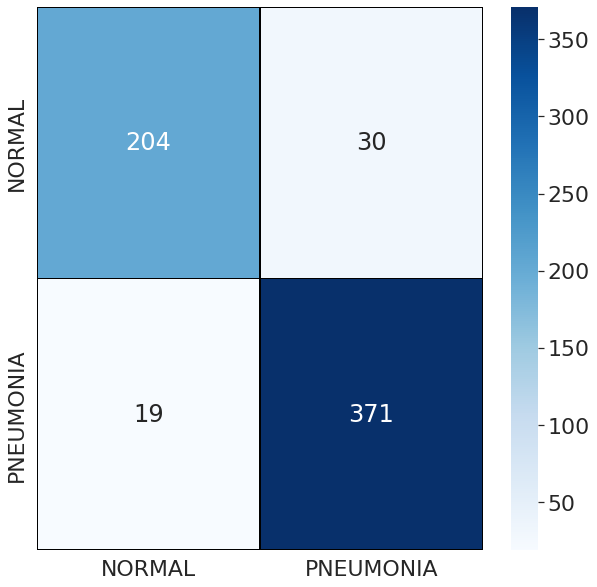

In [20]:
cm = confusion_matrix(y_test_3c, y_pred_vgg16)
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels, fmt="")

In [21]:
precisions, recalls, thresholds = precision_recall_curve(y_test_3c, y_pred_vgg16)
fpr, tpr, thresholds2 = roc_curve(y_test_3c, y_pred_vgg16)

f1_score_vgg16 = 2 * ((precisions * recalls) / (precisions + recalls))
precision_vgg16 = precisions
recall_vgg16 = recalls

**AUC** Area Under the Curve

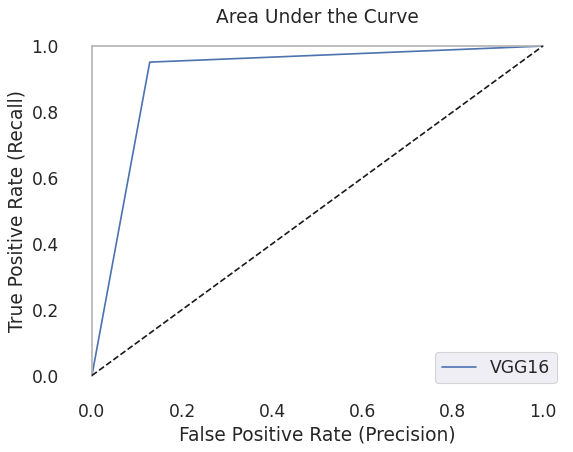

In [22]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr, tpr)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['VGG16'], loc='best')
ax.set_facecolor("white")
plt.show()

Metrics

In [23]:
print("Loss of the model is - " , model_vgg_16.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[0])
print("Accuracy of the model is - " , model_vgg_16.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]*100 , "%")
acc_vgg16 = model_vgg_16.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]

20/20 [==============================] - 6s 295ms/step - loss: 0.3713 - accuracy: 0.8702
Loss of the model is -  0.3713301420211792
20/20 [==============================] - 6s 296ms/step - loss: 0.3606 - accuracy: 0.8782
Accuracy of the model is -  87.82051205635071 %
20/20 [==============================] - 6s 294ms/step - loss: 0.3560 - accuracy: 0.8670


#### Predictions

In [34]:
correct = np.nonzero(y_test_3c == y_pred_vgg16)[0]
print('Correct Predicted: ', len(correct))
incorrect = np.nonzero(y_test_3c != y_pred_vgg16)[0]
print('Incorrect Predicted: ', len(incorrect))

Correct Predicted:  575
Incorrect Predicted:  49


Correctly Predicted Classes

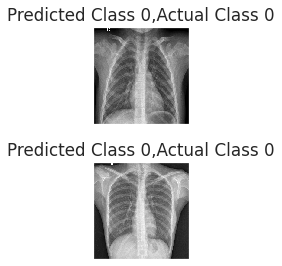

In [35]:
i = 0
for c in correct[1:3]:
    plt.subplot(2,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_3c[c], cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred_vgg16[c], y_test_3c[c]))
    plt.tight_layout()
    i += 1

Incorectly Predicted Classes

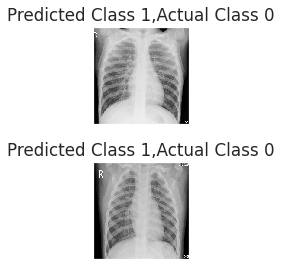

In [36]:
i = 0
for c in incorrect[1:3]:
    plt.subplot(2,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_3c[c], cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred_vgg16[c], y_test_3c[c]))
    plt.tight_layout()
    i += 1

### VGG 19

#### Model

In [41]:
vgg19 = VGG19(input_shape = (224,224,3), weights = "imagenet", include_top = False)

In [42]:
# We should not train the existing weights otherwise the weights that we captured will get changed
for layer in vgg19.layers:
  layer.trainable = False

# Our layers - we can add more if we want. Here we will flatten the existing layers
x = Flatten()(vgg19.output)

# Lets create the output layer
prediction = Dense(1, activation = "sigmoid")(x)

# Creating a model object
model_vgg19 = Model(inputs = vgg19.input, outputs = prediction)

# Creating a model object
model_vgg19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [43]:
# Compiling the model - telling the model what cost and optimizatiom method to use

model_vgg19.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

#### Training

In [44]:
#Setting callbakcs
#Reduce learning rate when a metric has stopped improving.
learning_rate_reduction = ReduceLROnPlateau(
      monitor='accuracy', 
      patience = 2, 
      verbose=1,
      factor=0.3, 
      min_lr=0.000001
      )


# #Save the best model (as a function of val_accuracy) on the way to training
checkpoint = ModelCheckpoint('vgg19_best_model.hdf5', 
                             verbose=1, 
                             save_best_only=True, 
                             monitor='val_accuracy'
)

In [45]:
# Model Fitting
vgg_history = model_vgg19.fit_generator(datagen_3c.flow(x_train_3c,y_train_3c, batch_size = 32), validation_data = datagen_3c.flow(x_test_3c, y_test_3c), epochs = 15, callbacks = [checkpoint,learning_rate_reduction] ,verbose=1)

Epoch 1/15
163/163 [==============================] - ETA: 0s - loss: 0.2698 - accuracy: 0.8882
Epoch 1: val_accuracy improved from -inf to 0.79808, saving model to vgg19_best_model.hdf5
163/163 [==============================] - 68s 361ms/step - loss: 0.2698 - accuracy: 0.8882 - val_loss: 0.4320 - val_accuracy: 0.7981 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - ETA: 0s - loss: 0.1680 - accuracy: 0.9346
Epoch 2: val_accuracy improved from 0.79808 to 0.80769, saving model to vgg19_best_model.hdf5
163/163 [==============================] - 57s 350ms/step - loss: 0.1680 - accuracy: 0.9346 - val_loss: 0.4760 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 0.9379
Epoch 3: val_accuracy did not improve from 0.80769
163/163 [==============================] - 56s 344ms/step - loss: 0.1575 - accuracy: 0.9379 - val_loss: 0.5158 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 4/15
163/163 [===============

Prediction

In [46]:
predictions = model_vgg19.predict(x_test_3c)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

#y_pred
y_pred_vgg19 =  (predictions > 0.5).astype("int").reshape(624,)

#true_classes = test_generator.classes
y_label = y_test_3c

20/20 [==============================] - 4s 188ms/step


#### Evaluation

Training Accurancy

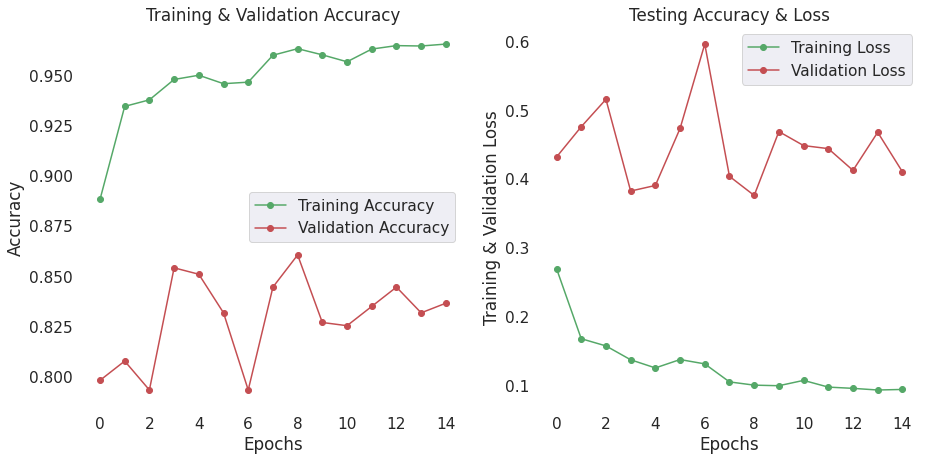

<Figure size 432x288 with 0 Axes>

In [51]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = vgg_history.history['accuracy']
train_loss = vgg_history.history['loss']
val_acc = vgg_history.history['val_accuracy']
val_loss = vgg_history.history['val_loss']
fig.set_size_inches(15,7)


# Plotting the loss
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_facecolor("white")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].set_facecolor("white")
plt.show()
plt.savefig("model1_trainingloss.jpg")

Classfication Report

In [52]:
target_names = ['NORMAL','PNEUMONIA']
print(classification_report(y_test_3c, y_pred_vgg19, target_names=target_names))

              precision    recall  f1-score   support

      NORMAL       0.94      0.86      0.90       234
   PNEUMONIA       0.92      0.97      0.95       390

    accuracy                           0.93       624
   macro avg       0.93      0.92      0.92       624
weighted avg       0.93      0.93      0.93       624



Confusion Matrix

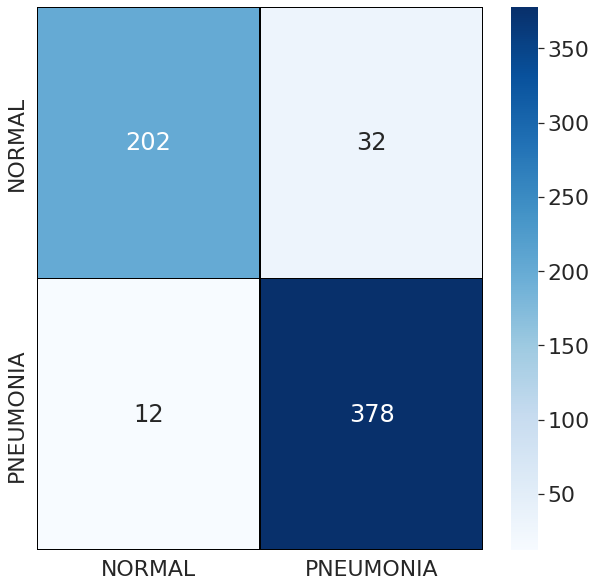

In [53]:
cm = confusion_matrix(y_test_3c, y_pred_vgg19)
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels, fmt="")

In [54]:
precisions, recalls, thresholds = precision_recall_curve(y_test_3c, y_pred_vgg19)
fpr, tpr, thresholds2 = roc_curve(y_test_3c, y_pred_vgg19)

f1_score_vgg19 = 2 * ((precisions * recalls) / (precisions + recalls))
precision_vgg19 = precisions
recall_vgg19 = recalls

**AUC** Area Under the Curve

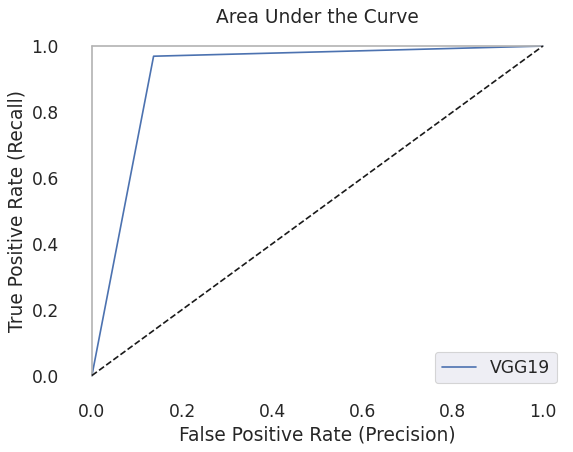

In [55]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr, tpr)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['VGG19'], loc='best')
ax.set_facecolor("white")
plt.show()

Metrics

In [59]:
print("Loss of the model is - " , model_vgg19.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[0])
print("Accuracy of the model is - " , model_vgg19.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]*100 , "%")
acc_vgg19 = model_vgg19.evaluate(datagen_3c.flow(x_test_3c,y_test_3c, batch_size = 32))[1]

20/20 [==============================] - 6s 292ms/step - loss: 0.4191 - accuracy: 0.8462
Loss of the model is -  0.41910842061042786
20/20 [==============================] - 6s 300ms/step - loss: 0.4020 - accuracy: 0.8510
Accuracy of the model is -  85.09615659713745 %
20/20 [==============================] - 6s 301ms/step - loss: 0.4081 - accuracy: 0.8429


#### Predictions

In [56]:
correct = np.nonzero(y_test_3c == y_pred_vgg19)[0]
print('Correct Predicted: ', len(correct))
incorrect = np.nonzero(y_test_3c != y_pred_vgg19)[0]
print('Incorrect Predicted: ', len(incorrect))

Correct Predicted:  580
Incorrect Predicted:  44


Corectly Predicted Classes

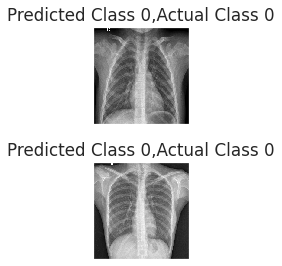

In [57]:
i = 0
for c in correct[1:3]:
    plt.subplot(2,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_3c[c], cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred_vgg19[c], y_test_3c[c]))
    plt.tight_layout()
    i += 1

Incorrectly Predicted Classes

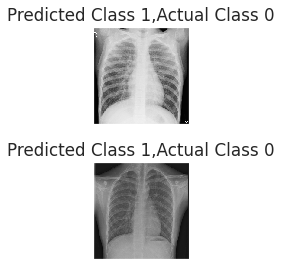

In [58]:
i = 0
for c in incorrect[1:3]:
    plt.subplot(2,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_3c[c], cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred_vgg19[c], y_test_3c[c]))
    plt.tight_layout()
    i += 1

### VIT

#### Data Pre Processing

Model Layer

In [13]:
CLASSES = {'NORMAL': 0, 'PNEUMONIA': 1}  
BATCH_SIZE = 8

params = dict(
    seed = 42,
    image_dim = (224,224),
    weight_decay = 0.0001,
    epochs = 10,
    batch_size = 64,
    patch_size = 36, #36
    pool_size = (2,2),
    optimizer = 'Adam',
    l_rate = 0.001,
    val_split = .2,
    use_transfer_learning = False,
    use_data_aug = False,

    l2_reg = .0,
    projection_dim = 8,
    num_heads = 4,

    # Size of the transformer layers
    transformer_layers = 8,
    num_classes = len(CLASSES), 
    mlp_head_units = [2048,1024]
    )

new_params = dict(
    num_patches = (params['image_dim'][0] // params['patch_size']) ** 2,
    transformer_units = [
    params['projection_dim'] * 2,
    params['projection_dim']],
    input_shape = (params['image_dim'][0], params['image_dim'][1], 3),

)
params.update(new_params)

if params['use_data_aug']:
  data_aug_params = dict(
      da_rotation = 10,
      da_w_shift = 0.1,
      da_h_shift = 0.05,
      da_shear = 0.1,
      da_zoom = 0.15,
      da_h_flip = True,
      da_v_flip = False,
  )

Multilayer perceptron

In [14]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

Patch creation as layer

In [15]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

(-0.5, 223.5, 223.5, -0.5)

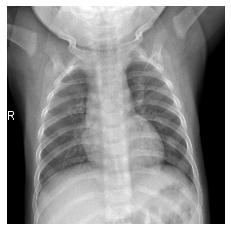

In [16]:
plt.figure(figsize=(4, 4))

image = x_train[0]
image = image[:,:,0]
label = labels[train[0][1]]
plt.imshow(image,cmap='gray') 
plt.axis("off")

Patch encoding layer

In [17]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

#### Model

In [18]:
dropout=0.1


def create_vit_classifier():
    #inputs = layers.Input(shape=params['input_shape'])
    inputs = layers.Input(shape=(224,224,1))
    # Augment data.
    #augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(params['patch_size'])(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(params['num_patches'], params['projection_dim'])(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(params['transformer_layers']):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=params['num_heads'], key_dim=params['projection_dim'], dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=params['transformer_units'], dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    # Add MLP.
    features = mlp(representation, hidden_units=params['mlp_head_units'], dropout_rate=0.5)

    #Classify outputs
    #logits = layers.Dense(len(CLASSES),'sigmoid')(features)

    logits = keras.layers.Dense(1, 'sigmoid')(features)
    
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [19]:
#Model
vit_model = create_vit_classifier()
#callback
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

# #Save the best model (as a function of val_accuracy) on the way to training
checkpoint5 = ModelCheckpoint('vit_best_model.hdf5', 
                             verbose=1, 
                             save_best_only=True, 
                             monitor='val_accuracy'
)
#Compile
vit_model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
vit_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 patches (Patches)              (None, None, 1296)   0           ['input_1[0][0]']                
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 36, 8)        10664       ['patches[0][0]']                
                                                                                                  
 layer_normalization (LayerNorm  (None, 36, 8)       16          ['patch_encoder[0][0]']      

#### Trainning

In [49]:
vit_history = vit_model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 15 , validation_data = datagen.flow(x_test, y_test) ,callbacks = [learning_rate_reduction])

Epoch 1/15
163/163 [==============================] - 19s 116ms/step - loss: 0.2960 - accuracy: 0.8867 - val_loss: 0.5179 - val_accuracy: 0.7516 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - 19s 116ms/step - loss: 0.2804 - accuracy: 0.8861 - val_loss: 0.4658 - val_accuracy: 0.7981 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - 19s 116ms/step - loss: 0.2881 - accuracy: 0.8871 - val_loss: 0.4196 - val_accuracy: 0.7949 - lr: 0.0010
Epoch 4/15
163/163 [==============================] - 19s 116ms/step - loss: 0.2723 - accuracy: 0.8903 - val_loss: 0.4048 - val_accuracy: 0.8269 - lr: 0.0010
Epoch 5/15
163/163 [==============================] - 19s 114ms/step - loss: 0.2736 - accuracy: 0.8911 - val_loss: 0.4052 - val_accuracy: 0.8045 - lr: 0.0010
Epoch 6/15
163/163 [==============================] - 19s 115ms/step - loss: 0.2710 - accuracy: 0.8924 - val_loss: 0.6969 - val_accuracy: 0.7308 - lr: 0.0010
Epoch 7/15
163/163 [==============================] 

Prediction

In [27]:
predictions = vit_model.predict(x_test)
predictions = predictions.reshape(1,-1)[0]

y_pred_vit =  (predictions > 0.5).astype("int").reshape(624,)
y_label = y_test

20/20 [==============================] - 0s 13ms/step


#### Evaluation

Training Accurancy

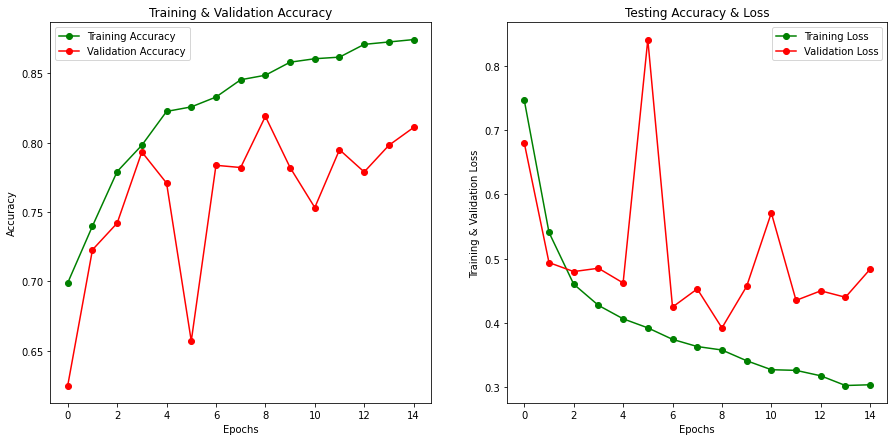

<Figure size 432x288 with 0 Axes>

In [22]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = vit_history.history['accuracy']
train_loss = vit_history.history['loss']
val_acc = vit_history.history['val_accuracy']
val_loss = vit_history.history['val_loss']
fig.set_size_inches(15,7)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_facecolor("white")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].set_facecolor("white")
plt.show()
plt.savefig("modelViT_trainingloss.jpg")

Classification Report

In [23]:
target_names = ['NORMAL','PNEUMONIA']
print(classification_report(y_test, y_pred_vit, target_names = target_names))

              precision    recall  f1-score   support

      NORMAL       0.82      0.61      0.70       234
   PNEUMONIA       0.80      0.92      0.85       390

    accuracy                           0.80       624
   macro avg       0.81      0.76      0.78       624
weighted avg       0.81      0.80      0.80       624



Confusion Matrix

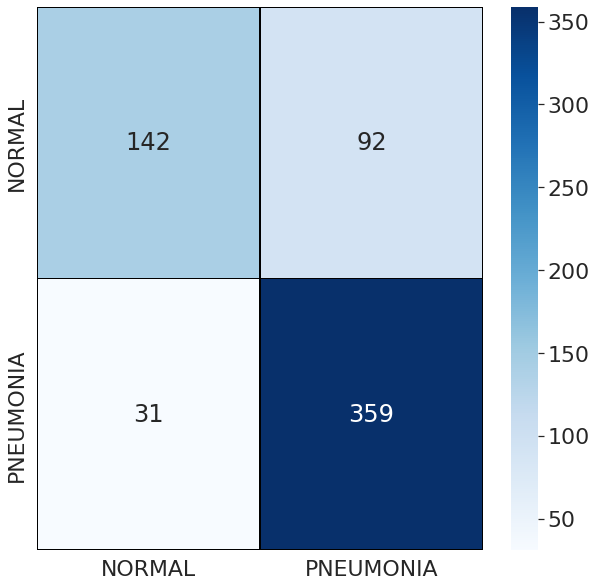

In [24]:
cm = confusion_matrix(y_test, y_pred_vit)
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels, fmt="")
plt.show()

In [29]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_vit)
fpr, tpr, thresholds2 = roc_curve(y_test, y_pred_vit)

f1_score_vit = 2 * ((precisions * recalls) / (precisions + recalls))
precision_vit = precisions
recall_vit = recalls

**AUC** Area Under the Curve

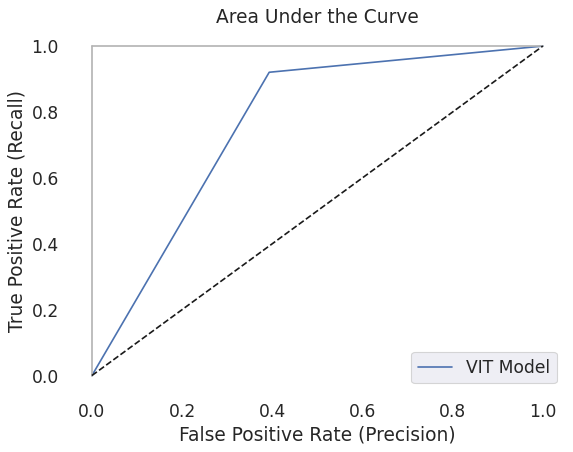

In [30]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes()
plt.plot(fpr, tpr)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Area Under the Curve')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(['VIT Model'], loc='best')
ax.set_facecolor("white")
plt.show()

Metrics

In [31]:
print("Loss of the model is - " , vit_model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , vit_model.evaluate(x_test,y_test)[1]*100 , "%")
acc_vit = vit_model.evaluate(x_test,y_test)[1]

20/20 [==============================] - 0s 14ms/step - loss: 0.4288 - accuracy: 0.8029
Loss of the model is -  0.4287671446800232
20/20 [==============================] - 0s 14ms/step - loss: 0.4288 - accuracy: 0.8029
Accuracy of the model is -  80.28846383094788 %
20/20 [==============================] - 0s 14ms/step - loss: 0.4288 - accuracy: 0.8029


#### Predictions

In [32]:
correct = np.nonzero(y_test == y_pred_vit)[0]
print('Correct Predicted: ', len(correct))
incorrect = np.nonzero(y_test != y_pred_vit)[0]
print('Incorrect Predicted: ', len(incorrect))

Correct Predicted:  501
Incorrect Predicted:  123


Correctly Predicted Classes

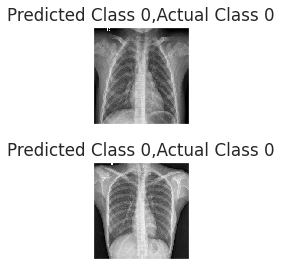

In [33]:
i = 0
for c in correct[1:3]:
    plt.subplot(2,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(224,224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred_vit[c], y_test[c]))
    plt.tight_layout()
    i += 1

Incorrectly Predicted Classes

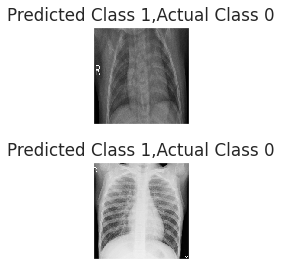

In [34]:
i = 0
for c in incorrect[1:3]:
    plt.subplot(2,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(224,224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred_vit[c], y_test[c]))
    plt.tight_layout()
    i += 1

### General Results

### Area Under The Curve